Sources: 

- Robert Haase, Center for Systems Biology Dresden, https://github.com/BiAPoL/Bio-image_Analysis_with_Python

- Bhattiprolu, S. https://www.youtube.com/watch?v=A4po9z61TME&t=1471s

In [ ]:
# ALL ABOUT METADATA IN MEDICAL AND SCIENTIFIC IMAGES

"""
What is Metadata?
It is the additional information about a file, providing details such as the 
creation date, author, location, pixel size, experimental settings, etc. 

Why is Metadata important? 
For your travel images, it is important so you know when and where the image was taken. 
Please note that metadata is not necessary but useful when some information is
needed at a future date. May be your grandkids want to take a picture in future 
at the same location on your 100th birthday!

For scientific images, it is important to ensure traceability, interoperability,
and reproducibility. 

Metadata provides a detailed history of the image, including acquisition parameters, 
equipment settings, and processing steps. This traceability is crucial for 
tracking the origin and evolution of the data, ensuring accountability and 
transparency in scientific research.

Standardized metadata formats enable different software and systems to understand 
and interpret information consistently. This promotes interoperability, allowing 
researchers to share and collaborate on data across various platforms and tools 
without losing critical details.

Metadata contains essential information about the experimental setup and conditions. 
Reproducing scientific experiments requires accurate knowledge of these factors. 
With comprehensive metadata, other researchers can precisely replicate experiments, 
verify results, and build upon existing work, contributing to the reliability 
and credibility of scientific findings.

Images come in many formats, let us explore metadata from a few most-common 
image formats including JPG, DICOM, TIFF, GEO-TIFF, OME-TIFF, and .CZI

"""



In [25]:
###########################################################################
## JPEG/JPG IMAGES

"""
JPEG images - from our phones and cameras

Metadata for JPG images is standardized, and the standard used is called 
Exif (Exchangeable image file format).
JPG typically stores basic metadata like date, camera settings, and location in 
the Exif header.

Japan Electronics and Information Technology Industries Association (JEITA) produced
the initial dfinition of Exif standard. Today, JEITA along with  
Camera & Imaging Products Association (CIPA) defines and maintains 
the Exif standard to ensure compatibility and uniformity in metadata across 
various devices and software that handle digital images.

JPEG is not commonly used in medical imaging for diagnostic purposes due to its lossy compression,
which can degrade image quality and lead to the loss of critical details.
However, it can be used in certain non-diagnostic scenarios. 

"""

#Pillow provides direct access to the Exif (Exchangeable Image File Format)
#metadata through the getexif() method.
from PIL import Image

# Open the image
image = Image.open('m2_images/SF_downtown.jpg')
image.show()

In [26]:
# Extract the EXIF metadata
exif_data = image.getexif()

In [27]:
# Print the EXIF metadata
for tag, value in exif_data.items():
    print(f"{tag}: {value}")     

282: 300.0
283: 300.0
270: Classic view of historic traditional Cable Cars riding on famous California Street in beautiful early morning light at sunrise in summer with retro vintage style cross processing filter effect, San Francisco, California, USA


In [28]:
from PIL.ExifTags import TAGS
if exif_data:
    for tag_id, value in exif_data.items():
        # Get the tag name from its ID
        tag = TAGS.get(tag_id, tag_id)
        print(f"{tag}: {value}")
else:
    print("No EXIF metadata found.")

XResolution: 300.0
YResolution: 300.0
ImageDescription: Classic view of historic traditional Cable Cars riding on famous California Street in beautiful early morning light at sunrise in summer with retro vintage style cross processing filter effect, San Francisco, California, USA


In [3]:
#########################################################

### MOVING ON TO SCIENIFIC IMAGES ##################

##########################################################

"""
## DICOM images ###

DICOM (Digital Imaging and Communications in Medicine) is the international 
standard for medical images. DICOM metadata standards were originally defined by the 
American College of Radiology (ACR) and the National Electrical Manufacturers 
Association (NEMA) in 1983 by forming a joint committee. 
Today, the DICOM Standard is managed by the 
Medical Imaging & Technology Alliance - a division of NEMA.

Metadata in DICOM files includes information about the image data, such as size, 
dimensions, bit depth, and modality used to create the data. DICOM metadata 
also includes patient information, image position data, and other relevant details.

pip install pydicom
# https://github.com/pydicom/pydicom
# Sample DICOM images downloaded from here: https://www.rubomedical.com/dicom_files/

#Accessing metadata using their tags
# https://www.dicomlibrary.com/dicom/dicom-tags/

"""
from matplotlib import pyplot as plt
from pydicom import dcmread

#  Read the DICOM file
dicom_data = dcmread('m2_images/brain.DCM')

In [4]:
# Access and print the metadata
print("DICOM Metadata:")
print(f"Patient Name: {dicom_data.PatientName}")
print(f"Patient ID: {dicom_data.PatientID}")
print(f"Modality: {dicom_data.Modality}")
print(f"Image Type: {dicom_data.ImageType}")

DICOM Metadata:
Patient Name: MR/BRAIN/GRASE/1024
Patient ID: 7
Modality: MR
Image Type: ['ORIGINAL', 'PRIMARY', 'OTHER', 'R', 'IR']


In [5]:
#Accessing metadata using their tags
# https://www.dicomlibrary.com/dicom/dicom-tags/

# Access the image type metadata using the tag (0008, 0008)
image_type = dicom_data[(0x0008, 0x0008)].value
# Print the image type metadata
print("Image Type:", image_type)

physician_name = dicom_data[(0x0008, 0x0090)].value
print("Physician's Name':", physician_name)

Image Type: ['ORIGINAL', 'PRIMARY', 'OTHER', 'R', 'IR']
Physician's Name': 


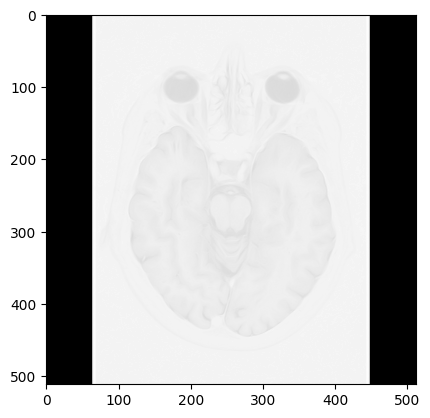

In [6]:
image_array = dicom_data.pixel_array
plt.imshow(image_array, cmap='gray');

In [8]:
image_array.min(), image_array.max()

(0, 2150)

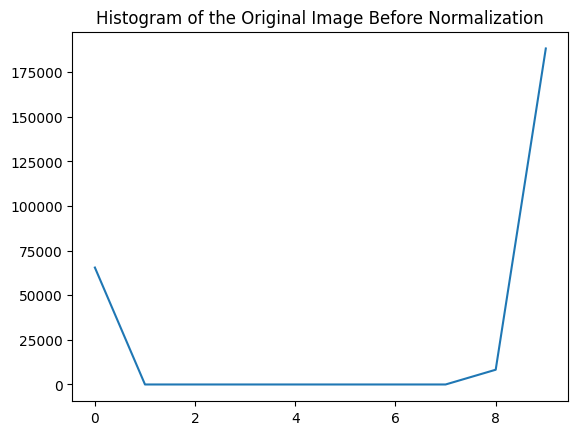

In [11]:
hist, bins = np.histogram(image_array.flatten())
plt.plot(hist, label="Original Histogram")
plt.title('Histogram of the Original Image Before Normalization');

In [ ]:
'''
In medical imaging, contrast refers to the difference in intensity or brightness
between adjacent regions in an image. It determines how well different structures,
tissues, or abnormalities can be distinguished from one another. 
High contrast makes features in an image more visible, while low contrast makes
it harder to differentiate between structures.
'''

In [15]:
## Let us enhance the image for visualization by normalizing pixel values 
# between 0 and 1 and the performing histogram equalization
import numpy as np
import cv2
# Normalize the pixel values between 0 and 1
pixel_array = (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))

# Apply histogram equalization
pixel_array = np.uint8(255 * pixel_array)  # Convert back to uint8 for histogram equalization


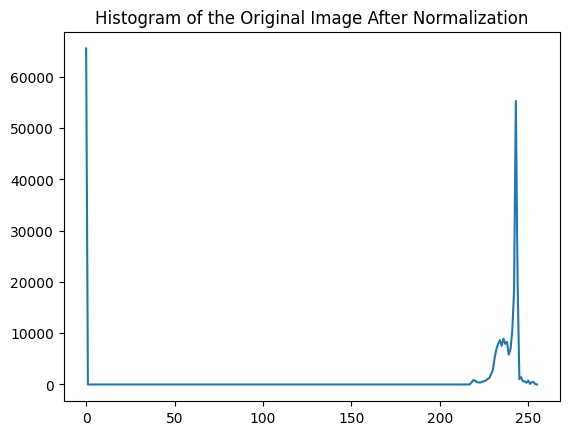

In [16]:
hist, bins = np.histogram(pixel_array.flatten(), bins=256, range=[0, 256])
plt.plot(hist)
plt.title('Histogram of the Original Image After Normalization');

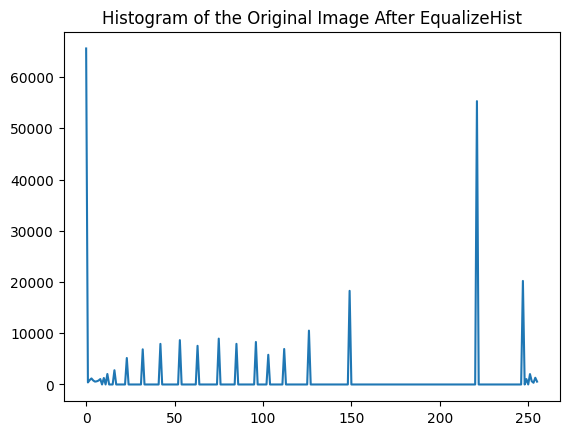

In [17]:
pixel_array_eq = cv2.equalizeHist(pixel_array)

hist, bins = np.histogram(pixel_array_eq.flatten(), bins=256, range=[0, 256])
plt.plot(hist)
plt.title('Histogram of the Original Image After EqualizeHist');

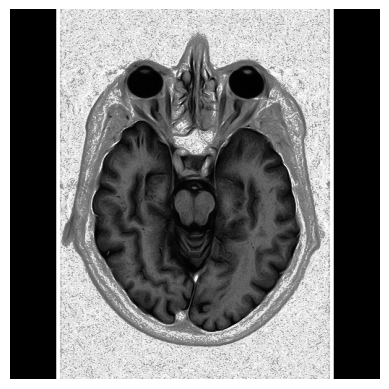

In [18]:
# Display the image
plt.imshow(pixel_array_eq, cmap='gray')
plt.axis('off')
plt.show()

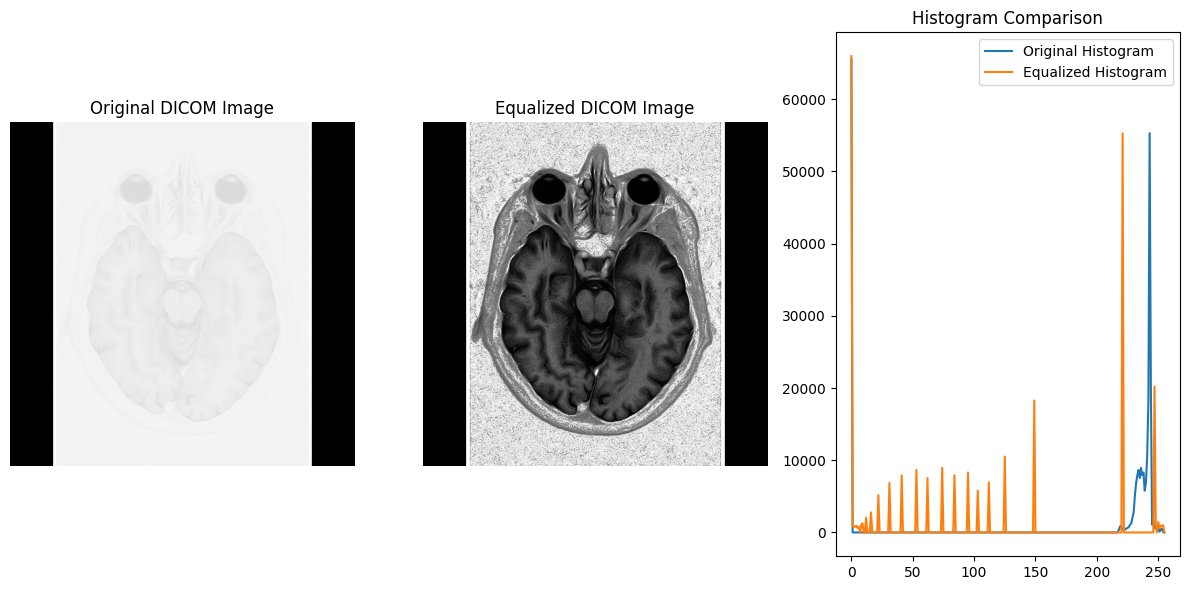

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Convert the pixel array to float for normalization
image_array = image_array.astype(np.float32)

# Step 2: Normalize the Pixel Values
# Scale pixel values to the range [0, 1]
image_normalized = (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))

# Scale the normalized image to [0, 255] and convert to uint8
image_scaled = np.uint8(image_normalized * 255)

# Step 3: Compute the Histogram
hist, bins = np.histogram(image_scaled.flatten(), bins=256, range=[0, 256])

# Step 4: Compute the Cumulative Distribution Function (CDF)
cdf = hist.cumsum()  # Compute cumulative sum of the histogram

# Scale the CDF to [0, 255]
cdf_min = cdf[cdf > 0][0]  # Minimum non-zero CDF value
cdf_scaled = ((cdf - cdf_min) / (cdf[-1] - cdf_min)) * 255
cdf_scaled = cdf_scaled.astype(np.uint8)

# Step 5: Map the Pixel Intensities
image_equalized = cdf_scaled[image_scaled]

# Step 6: Display the Results
plt.figure(figsize=(12, 6))

# Original DICOM Image
plt.subplot(1, 3, 1)
plt.imshow(image_scaled, cmap="gray")
plt.title("Original DICOM Image")
plt.axis("off")

# Histogram Equalized DICOM Image
plt.subplot(1, 3, 2)
plt.imshow(image_equalized, cmap="gray")
plt.title("Equalized DICOM Image")
plt.axis("off")

# Histograms
plt.subplot(1, 3, 3)
plt.plot(hist, label="Original Histogram")
plt.plot(np.histogram(image_equalized.flatten(), bins=256, range=[0, 256])[0], label="Equalized Histogram")
plt.title("Histogram Comparison")
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
dicom_data.keys;

In [ ]:
######################################################

"""
TIFF images: 

TIFF stands for Tagged Image File Format, a widely used file format for
storing high-quality images. It is popular in applications that require high precision,
rich color depth, and the ability to store metadata, such as medical imaging,
scientific visualization, and professional photography.

Used in applications like microscopy, pathology, and radiology to store multi-slice
images or high-precision data (e.g., 16-bit grayscale).
Often paired with DICOM for specific metadata requirements.
    
The TIFF format was initially introduced by Aldus Corporation, and the 
first version, TIFF 1.0, was released in 1986. Adobe Systems later became 
involved in the development and standardization of TIFF. Today, Adobe holds the 
copyright on the TIFF specification. 
    

Tiff uses a structured format called the Image File Directory (IFD) to store 
metadata information. The IFD contains tags that define various metadata fields 
such as image dimensions, color space, compression method, and more. 
Each tag in the IFD has a unique identifier (TagID) and is associated with a 
specific metadata field. The raw data for each tag is stored in the TIFF file 
along with its TagType, Count, and Offset. 
    
Useful resources:
https://www.loc.gov/preservation/digital/formats/content/tiff_tags.shtml

"""

In [21]:
import tifffile as tiff
### Now, let us extract some metadata and print ####
#First let us see what type of information is stored in the tiff file. 
#Print all attributes stored as part of the tiff_image.pages[0] attribute
tiff_image = tiff.TiffFile('m2_images/bubbles.tif')  
# Also try mito-0.2um_pixel.tif and Ti64.10X.tif
# mito-0.2um_pixel.tif has been modified in imageJ. 
attributes = dir(tiff_image.pages[0])
print(attributes)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_dtype', '_gettags', '_nextifd', 'andor_tags', 'asarray', 'aspage', 'asrgb', 'aszarr', 'axes', 'bitspersample', 'chunked', 'chunks', 'colormap', 'compression', 'databytecounts', 'dataoffsets', 'decode', 'description', 'description1', 'dtype', 'epics_tags', 'extrasamples', 'fillorder', 'flags', 'geotiff_tags', 'hash', 'imagedepth', 'imagelength', 'imagewidth', 'index', 'is_andor', 'is_contiguous', 'is_eer', 'is_epics', 'is_fei', 'is_final', 'is_fluoview', 'is_geotiff', 'is_imagej', 'is_lsm', 'is_mask', 'is_mdgel', 'is_mediacy', 'is_memmappable', 'is_metaseries', 'is_micromanager', 'is_mrc', 'is_multipage', 'is_ndpi', 'is_nih', 'is_

In [24]:
#Let us extract and print some metadata
def extract_tiff_metadata(tiff_path):
    import tifffile as tiff
    # Open the TIFF image
    tiff_image = tiff.TiffFile(tiff_path)

    # Extract the image dimensions
    width, height, channels = tiff_image.pages[0].shape  #Shape depends on the image type

    # Extract the color space information
    color_space = tiff_image.pages[0].photometric

    # Extract the bit depth
    bit_depth = tiff_image.pages[0].bitspersample

    # Extract the compression method
    compression = tiff_image.pages[0].compression

    # Extract the image acquisition date and time
    acquisition_date = tiff_image.pages[0].tags.get(306)

    # Extract the image description
    description = tiff_image.pages[0].description

    # Extract the software used
    software = tiff_image.pages[0].software

    # Extract the resolution
    resolution = tiff_image.pages[0].tags.get(282)

    # Extract the camera or device information
    device_info = tiff_image.pages[0].tags.get(271)

    # Extract the GPS coordinates
    gps_info = tiff_image.pages[0].tags.get(34853)

    # Close the TIFF image
    tiff_image.close()

    # Return the extracted metadata
    metadata = {
        'width': width,
        'height': height,
        'color_space': color_space,
        'bit_depth': bit_depth,
        'compression': compression,
        'acquisition_date': acquisition_date,
        'description': description,
        'software': software,
        'resolution': resolution,
        'device_info': device_info,
        'gps_info': gps_info
    }
    return metadata

# Example usage
#tiff_path = 'mito.tif'
tiff_path = 'm2_images/bubblesFiji.tif'
metadata = extract_tiff_metadata(tiff_path)

# Print the extracted metadata
for key, value in metadata.items():
    print(f'{key}: {value}')
    

width: 1024
height: 1024
color_space: 2
bit_depth: 8
compression: 1
acquisition_date: None
description: ImageJ=1.54f
unit=inch
software: 
resolution: TiffTag 282 XResolution @142 RATIONAL @212 (96000000, 1000000)
device_info: None
gps_info: None
